Exercise 1 Solution

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Load the Iris data.
data = load_iris()
inputs = data.data
targets = data.target

In [7]:
# Project the data into two dimensions using PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

In [8]:
# Train the classifier
classifier = KNeighborsClassifier(n_neighbors=10).fit(inputs,targets)
classifiedData = classifier.predict(inputs)

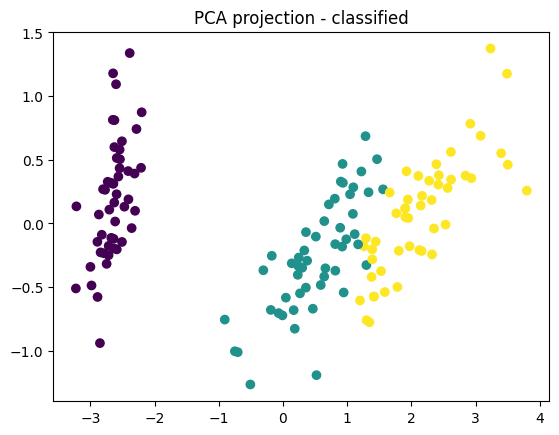

In [9]:
# Plot the results
plt.figure()
plt.scatter(compressed[:,0],compressed[:,1],c=classifiedData)
plt.title("PCA projection - classified")
plt.savefig("iris_pca_classified.png",bbox_inches="tight")
plt.show()

Exercise 2 Solution

In [10]:
import pandas
import numpy as np

In [16]:
# Load the data using Pandas. Print it to view it.
data = pandas.read_csv("Iris.csv")
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [17]:
# Extract the inputs
inputs = data.values[:,:-1].astype(float)

# Extract the targets - convert to numerical values to help with colouring when we plot the results
classes = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
targets = [classes.index(cls_str) for cls_str in data.values[:,-1].astype(str)]
targets = np.array(targets)

In [18]:
# Project the data into two dimensions using PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

In [19]:
# Train the classifier
classifier = KNeighborsClassifier(n_neighbors=10).fit(inputs,targets)
classifiedData = classifier.predict(inputs)

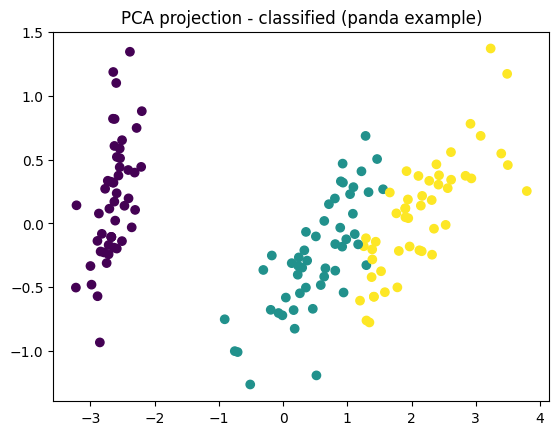

In [21]:
### Plot the results
plt.figure()
plt.scatter(compressed[:,0],compressed[:,1],c=classifiedData)
plt.title("PCA projection - classified (panda example)")
plt.savefig("iris_pca_classified_pandas.png",bbox_inches="tight")
plt.show()

Exercise 3 Solution

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Load the data
digits = load_digits()

In [25]:
# Extract the three parts of the data
data = digits.data
images = digits.images
targets = digits.target

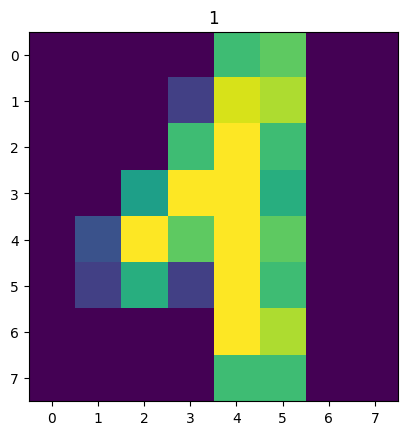

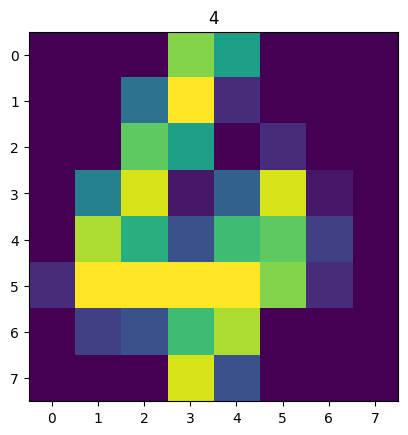

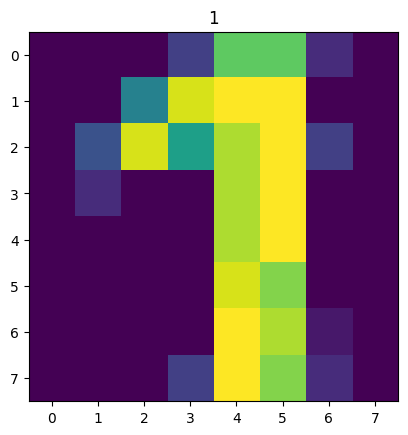

In [34]:
# Plot some of the digits
for idx in [200, 800, 1500]:
 plt.figure()
 plt.imshow(images[idx,:])
 plt.title(targets[idx])
 plt.savefig(f"digit_{idx}.pdf", bbox_inches="tight")


In [29]:
# Reduce the dimensionality with PCA
compressed = PCA(n_components=2).fit_transform(data)

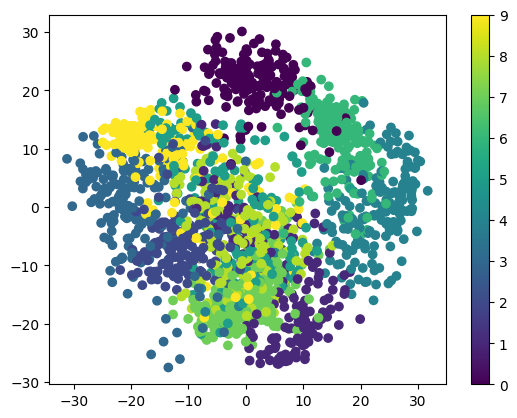

In [30]:
# Plot the resulting PCA embedding.
plt.figure()
plt.scatter(compressed[:,0],compressed[:,-1],c=targets, cmap="viridis")
plt.colorbar()
plt.savefig("digits_PCA.pdf",bbox_inches="tight")

In [32]:
# Split the data into training and testing sets.
xtrain, xtest, ttrain ,ttest= train_test_split(compressed,targets)

In [33]:
# Train the classifier and run the test data through it.
classifier = SVC(gamma="auto")
classifier.fit(xtrain,ttrain)
ytrain = classifier.predict(xtrain)
ytest = classifier.predict(xtest)

In [40]:
# Compute and print the model accuracy.
trainAccuracy = accuracy_score(ttrain,ytrain)
testAccuracy = accuracy_score(ttest,ytest)
print(f"{trainAccuracy} training accuracy, {testAccuracy} testing accruacy")

0.807720861172977 training accuracy, 0.6133333333333333 testing accruacy
